Available columns in dataset: ['ID', 'LAST_UPDATED_DATE', 'LAST_UPDATED_TIMESTAMP', 'DUPLICATES', 'POSTED', 'EXPIRED', 'DURATION', 'SOURCE_TYPES', 'SOURCES', 'URL', 'ACTIVE_URLS', 'ACTIVE_SOURCES_INFO', 'TITLE_RAW', 'BODY', 'MODELED_EXPIRED', 'MODELED_DURATION', 'COMPANY', 'COMPANY_NAME', 'COMPANY_RAW', 'COMPANY_IS_STAFFING', 'EDUCATION_LEVELS', 'EDUCATION_LEVELS_NAME', 'MIN_EDULEVELS', 'MIN_EDULEVELS_NAME', 'MAX_EDULEVELS', 'MAX_EDULEVELS_NAME', 'EMPLOYMENT_TYPE', 'EMPLOYMENT_TYPE_NAME', 'MIN_YEARS_EXPERIENCE', 'MAX_YEARS_EXPERIENCE', 'IS_INTERNSHIP', 'SALARY', 'REMOTE_TYPE', 'REMOTE_TYPE_NAME', 'ORIGINAL_PAY_PERIOD', 'SALARY_TO', 'SALARY_FROM', 'LOCATION', 'CITY', 'CITY_NAME', 'COUNTY', 'COUNTY_NAME', 'MSA', 'MSA_NAME', 'STATE', 'STATE_NAME', 'COUNTY_OUTGOING', 'COUNTY_NAME_OUTGOING', 'COUNTY_INCOMING', 'COUNTY_NAME_INCOMING', 'MSA_OUTGOING', 'MSA_NAME_OUTGOING', 'MSA_INCOMING', 'MSA_NAME_INCOMING', 'NAICS2', 'NAICS2_NAME', 'NAICS3', 'NAICS3_NAME', 'NAICS4', 'NAICS4_NAME', 'NAICS5', 

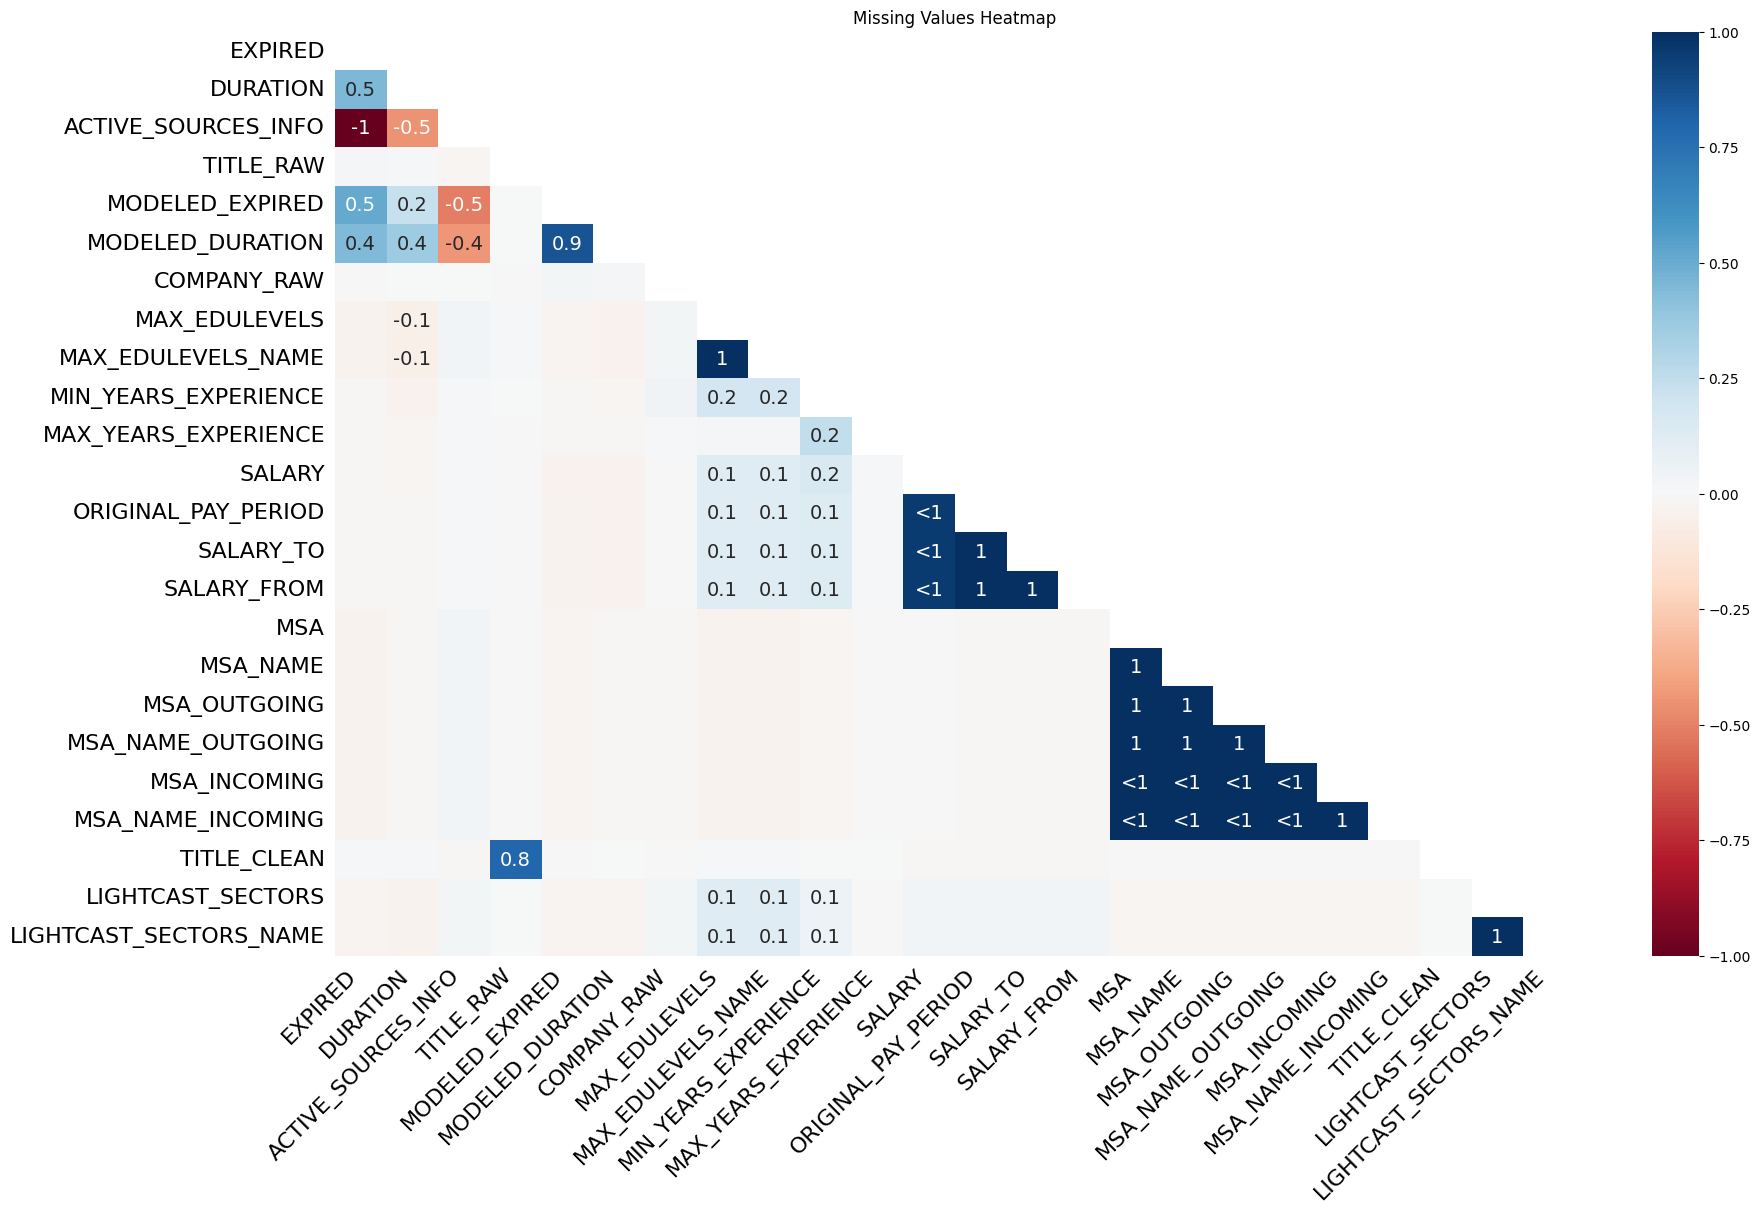

⚠️ Warning: 'SALARY' column not found in dataframe!
⚠️ Warning: 'INDUSTRY' column not found in dataframe!
✅ Missing value handling complete.
Duplicates removed.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
df = pd.read_csv("lightcast_job_postings.csv")
print("Available columns in dataset:", df.columns.tolist())

columns_to_drop = [
    "ID", "URL", "ACTIVE_URLS", "DUPLICATES", "LAST_UPDATED_TIMESTAMP",
    "NAICS2", "NAICS3", "NAICS4", "NAICS5", "NAICS6",
    "SOC_2", "SOC_3", "SOC_5"
]

df.drop(columns=columns_to_drop, inplace=True)
print("Dropped unnecessary columns.")
print(df.columns)

# handle missing value
print("Missing values before cleaning:")
print(df.isnull().sum())



import missingno as msno
import matplotlib.pyplot as plt

# Check column names
df.columns = df.columns.str.upper().str.strip()  # Normalize column names
print(df.columns)  # Debugging step

# Visualize missing data
msno.heatmap(df)
plt.title("Missing Values Heatmap")
plt.show()

# Drop columns with >50% missing values
df.dropna(thresh=len(df) * 0.5, axis=1, inplace=True)

# Check if "SALARY" exists before filling missing values
if "SALARY" in df.columns:
    df["SALARY"].fillna(df["SALARY"].median(), inplace=True)
else:
    print("⚠️ Warning: 'SALARY' column not found in dataframe!")

# Check if "INDUSTRY" exists before filling missing values
if "INDUSTRY" in df.columns:
    df["INDUSTRY"].fillna("Unknown", inplace=True)
else:
    print("⚠️ Warning: 'INDUSTRY' column not found in dataframe!")

print("✅ Missing value handling complete.")

# delete duplicates
df = df.drop_duplicates(subset=["TITLE", "COMPANY", "LOCATION", "POSTED"])
print("Duplicates removed.")


In [2]:
if "SALARY" in df.columns:
    df["SALARY"].fillna(df["SALARY"].median(), inplace=True)
else:
    print("⚠️ Warning: 'SALARY' column not found in dataframe!")

⚠️ Warning: 'SALARY' column not found in dataframe!


In [3]:
# identifying data analyst jobs by keyword searching
keywords = ['Data Analyst', 'Business Analyst', 'Data Engineering', 'Deep Learning',
            'Data Science', 'Data Analysis','Data Analytics',  'Market Research Analyst' 
            'LLM', 'Language Model', 'NLP', 'Natural Language Processing',
            'Computer Vision', 'Business Intelligence Analyst', 'Quantitative Analyst', 'Operations Analyst']

match = lambda col: df[col].str.contains('|'.join(keywords), case=False, na=False)

df['DATA_ANALYST_JOB'] = match('TITLE_NAME') \
             | match('SKILLS_NAME') \
             | match('SPECIALIZED_SKILLS_NAME') 
df['DATA_ANALYST_JOB'].value_counts()

DATA_ANALYST_JOB
False    37052
True     32148
Name: count, dtype: int64

In [4]:
df['DATA_ANALYST_JOB']

0        False
1        False
2         True
3        False
4        False
         ...  
72471     True
72472     True
72473     True
72474     True
72475    False
Name: DATA_ANALYST_JOB, Length: 69200, dtype: bool

In [6]:
import plotly.express as px

# Define custom colors for 'True' and 'False' categories
color_map = {
    False: "#d62728" ,   # Red
    True: "#3BB143 "   # Green
}


fig = px.bar(df_grouped, 
             x='NAICS2_NAME', 
             y='Job_Count',
             color='DATA_ANALYST_JOB',
             title="Data Analytics & Business Analytics Job Trends",
              labels={'NAICS2_NAME': 'Industry', 'Job_Count': 'Number of Jobs'},
             barmode='group',
             color_discrete_map=color_map  # Custom colors
            )

fig.update_layout(
    yaxis=dict(
        title="Number of Jobs", 
        range=[0, df_grouped['Job_Count'].max() * 1.2]  # Increase y-axis height
    ),
    height=700,  # Make the figure taller
    xaxis=dict(
        tickangle=-45  # Rotate x-axis labels for better readability
    )
)

fig.show()


In [19]:
import plotly.express as px

# Identify the top 2 industries with the most data analyst jobs
top_industries = df_grouped.groupby("NAICS2_NAME")["Job_Count"].sum().nlargest(10).index

# Filter the original grouped DataFrame, not the raw df
df_top_industries = df_grouped[df_grouped["NAICS2_NAME"].isin(top_industries)]

# Create the bar chart to analyze job counts within these industries
fig = px.bar(df_top_industries, 
             x="DATA_ANALYST_JOB", 
             y="Job_Count", 
             color="NAICS2_NAME",
             title="Top 2 Industries Hiring Data Analysts",
             labels={'DATA_ANALYST_JOB': 'Job Title', 'Job_Count': 'Number of Jobs'},
             barmode='group')

fig.show()


In [11]:
# Define target industries
target_industries = ["Finance and Insurance", "Health Care and Social Assistance"]

# Filter the DataFrame
df_skills = df[df["NAICS2_NAME"].isin(target_industries)]


In [22]:
import plotly.express as px

# Define target industries
target_industries = ["Finance and Insurance", "Health Care and Social Assistance"]

# Filter the original DataFrame (df) instead of df_grouped
df_remote = df[df["NAICS2_NAME"].isin(target_industries)]

# Count occurrences of each remote type in these industries
df_remote_grouped = df_remote.groupby("REMOTE_TYPE_NAME").size().reset_index(name="Count")

# Create a pie chart
fig = px.pie(df_remote_grouped, 
             names="REMOTE_TYPE_NAME", 
             values="Count", 
             title="Remote vs. On-Site Data Analyst Jobs in Finance & Healthcare",
             color="REMOTE_TYPE_NAME", 
             color_discrete_map={"Remote": "#1f77b4", "On-Site": "#d62728", "Hybrid": "#2ca02c"})

fig.show()
